# Hidden Links Analysis using Clustering & switching to a node of same cluster

## Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading dataset

In [3]:
from ReadingDataSet import ReadingDataSet
from os import mkdir
from os.path import exists
import pickle

dataSet = ReadingDataSet()
# Dictionary containing all dataframes
All_dfs = dataSet.All_dfs

d:\This is My file\Dr.Mervat Internship\Clustring task\CheckSynonymForColumns.py:41: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  storePercentages[newColumns[j]] = doc1.similarity(doc2)
d:\This is My file\Dr.Mervat Internship\Clustring task\CheckSynonymForColumns.py:41: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with wor

Index(['IntOrders_id', 'IntShip_id', 'quantity', 'placed_when', 'actual_date',
       'expected_date', 'cost', 'status'],
      dtype='object')
manufacturing Different_suppliers
products warehouses
warehouses product_types
Index(['retailer_id', 'country', 'city_name', 'type', 'reviews_number',
       'retailer_types', 'rating', 'opening_hours', 'capacity (units)',
       'products_sold'],
      dtype='object')


## Nodes and Edges dataframes


In [4]:
myedges = pd.read_csv("myedges.csv", index_col=0)
mynodes = pd.read_csv("mynodes.csv", index_col=0)


In [5]:
myedges

,From,To,From_Table,To_Table,Weight,Rental price,Transportation_distance,Type,price,profit_margin (%),market_share (%),Annual_sales,Edge_Name
0,1240,1600,Supplier,Ssintship,10,0,0,0,0.00,0,0,0.00,ssintship
1,1600,1164,Ssintship,Supplier,20,0,0,0,0.00,0,19,5.21,ssintship
2,1159,1601,Supplier,Ssintship,10,0,0,0,0.00,0,0,0.00,ssintship
3,1601,1072,Ssintship,Supplier,35,0,0,0,0.00,0,86,76.43,ssintship
4,1126,1602,Supplier,Ssintship,10,0,0,0,0.00,0,0,0.00,ssintship
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8115,5907,3114,Ssintorders,Products,70,0,0,0,132.72,40,0,0.00,Orders_Prodcut
8116,2135,5908,Ssintship,Ssintorders,10,0,0,0,0.00,0,0,0.00,Order
8117,5908,2966,Ssintorders,Products,90,0,0,0,7040.86,29,0,0.00,Orders_Prodcut
8118,2136,5909,Ssintship,Ssintorders,10,0,0,0,0.00,0,0,0.00,Order


In [6]:
mynodes

,Label,ID,Attributes
0,supplier,34258,"{'supplier_name': 'Taylor PLC', 'country': ""La..."
1,supplier,40868,"{'supplier_name': 'Sorrentino SPA', 'country':..."
2,supplier,27813,"{'supplier_name': 'Persico e figli', 'country'..."
3,supplier,57551,"{'supplier_name': 'Karge OHG mbH', 'country': ..."
4,supplier,50099,"{'supplier_name': 'Smith, Porter and Lynch', '..."
...,...,...,...
5905,ssintorders,10448,"{'quantity': 766, 'placed_when': '1993-05-08',..."
5906,ssintorders,10449,"{'quantity': 766, 'placed_when': '1993-05-08',..."
5907,ssintorders,10450,"{'quantity': 766, 'placed_when': '1993-05-08',..."
5908,ssintorders,10451,"{'quantity': 766, 'placed_when': '1993-05-08',..."


## Classes defined as Nodes

In [7]:
print(mynodes.Label.unique())
len(mynodes.Label.unique())

['supplier' 'retailer' 'customer' 'warehouses' 'externaltransactions'
 'internaltransactions' 'srintship' 'rcextship' 'scextship' 'ssintship'
 'internalservices' 'rcextorders' 'facilities' 'externalservices'
 'products' 'srintorders' 'scextorders' 'ssintorders']


18

In [8]:
all_nodes=dict()
for n in mynodes.Label.unique():
    all_nodes[f"{n}_nodes"]=(mynodes[(mynodes["Label"] ==n)])

all_nodes

{'supplier_nodes':         Label     ID                                         Attributes
 0    supplier  34258  {'supplier_name': 'Taylor PLC', 'country': "La...
 1    supplier  40868  {'supplier_name': 'Sorrentino SPA', 'country':...
 2    supplier  27813  {'supplier_name': 'Persico e figli', 'country'...
 3    supplier  57551  {'supplier_name': 'Karge OHG mbH', 'country': ...
 4    supplier  50099  {'supplier_name': 'Smith, Porter and Lynch', '...
 ..        ...    ...                                                ...
 295  supplier  90256  {'supplier_name': 'Förster', 'country': 'Ethio...
 296  supplier  35266  {'supplier_name': 'Gotthard Zahn GmbH', 'count...
 297  supplier  52647  {'supplier_name': 'Cook-Webb', 'country': 'Mor...
 298  supplier  13355  {'supplier_name': 'Shah-Lowe', 'country': 'Cen...
 299  supplier  48467  {'supplier_name': 'Brandt Ltd', 'country': 'An...
 
 [300 rows x 3 columns],
 'retailer_nodes':         Label     ID                                        

## Expanding Attributes column

In [9]:
All_dfs["supplier"]

,supp_id,supplier_name,country,city_name,currency,type,number_of_employees,Annual_sales,number_of_orders,market_share (%),market_capitalization ($)
0,34258,Taylor PLC,Lao People's Democratic Republic,Viangchan,Dollars,Financial Services,446,465.22,5565,48,5.970000e+11
1,40868,Sorrentino SPA,Mozambique,Gaza,Dollars,Real Estate,533,8881.74,1871,98,9.170000e+11
2,27813,Persico e figli,Saint Martin (French part),Unknown,Dollars,"Paper, Forest Products & Packaging",578,58.99,8611,9,6.980000e+11
3,57551,Karge OHG mbH,Brunei Darussalam,Belait,Dollars,Oil & Gas,145,3.35,4320,41,8.790000e+11
4,50099,"Smith, Porter and Lynch",Palau,Ngatpang,Dollars,Automotive & Assembly,872,8.39,2090,78,6.050000e+11
...,...,...,...,...,...,...,...,...,...,...,...
295,90256,Förster,Ethiopia,Addis Ababa,Dollars,"Paper, Forest Products & Packaging",764,7024.13,7003,46,6.919014e+10
296,35266,Gotthard Zahn GmbH,Finland,Pohjanmaa,Dollars,Healthcare Systems & Services,570,6.51,7985,42,1.470000e+11
297,52647,Cook-Webb,Morocco,Berkane,Dollars,"Paper, Forest Products & Packaging",762,10.69,2171,35,7.630000e+11
298,13355,Shah-Lowe,Central African Republic,Bamingui-Bangoran,Dollars,Automotive & Assembly,862,37.45,6844,50,2.150000e+11


In [10]:
mynodes.Label.unique()

array(['supplier', 'retailer', 'customer', 'warehouses',
       'externaltransactions', 'internaltransactions', 'srintship',
       'rcextship', 'scextship', 'ssintship', 'internalservices',
       'rcextorders', 'facilities', 'externalservices', 'products',
       'srintorders', 'scextorders', 'ssintorders'], dtype=object)

## Separating each node according to its Label

In [11]:
from IPython.display import display, HTML

train_data=dict()

# for key in list(set(list(All_dfs)) & set(mynodes.Label.unique())):
for key in mynodes.Label.unique():
    current_node=all_nodes[f"{key}_nodes"]
    current_node=current_node.drop(columns=["Attributes"])
    train_data[key]=pd.merge(All_dfs[key], current_node, left_on=list(All_dfs[key])[0], right_on='ID')
    # ids=list(filter(lambda x: "id" in x.lower(), list(train_data[key])))+["Label"]
    # print(ids)
    # train_data[key]=train_data[key].drop(columns=ids)

# for key, node in train_data.items():
#     print(key)
#     display(node)

## Testing KMeans Clustering model on sample node (customer_node)
### - We test using customer node assuming that this is the final node of the supply chain path

In [12]:
# sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)
customer_node=(pd.DataFrame( train_data["customer"]))
customer_node.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          150 non-null    int64 
 1   gender           150 non-null    object
 2   first_name       150 non-null    object
 3   last_name        150 non-null    object
 4   country          150 non-null    object
 5   nationality      150 non-null    object
 6   profession       150 non-null    object
 7   marital_status   150 non-null    object
 8   education_level  150 non-null    object
 9   age              150 non-null    int64 
 10  Label            150 non-null    object
 11  ID               150 non-null    int64 
dtypes: int64(3), object(9)
memory usage: 15.2+ KB


<AxesSubplot:xlabel='age', ylabel='Count'>

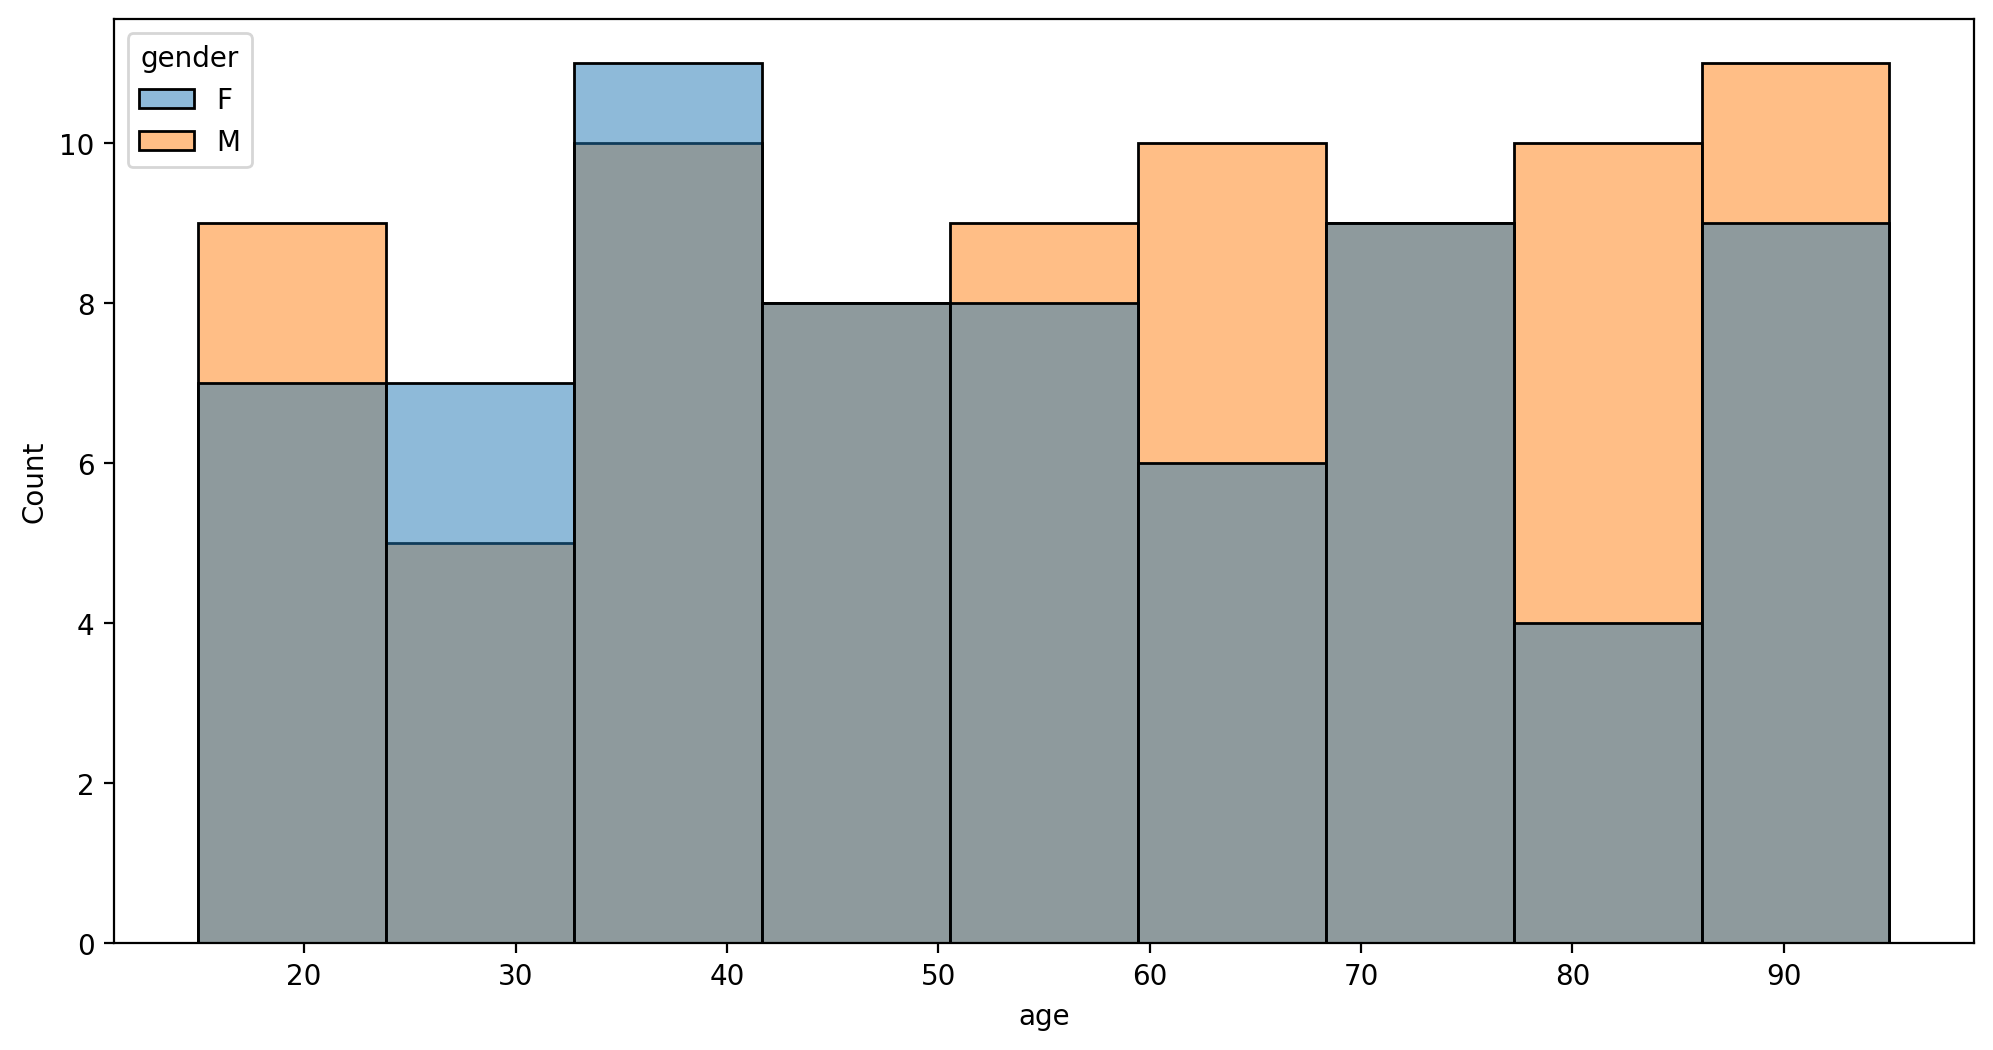

In [13]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=customer_node,x='age',hue="gender")

## Preprocessing data

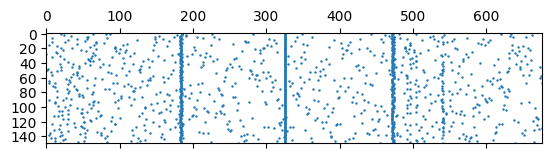

In [14]:

from sklearn.preprocessing import OneHotEncoder


ids=list(filter(lambda x: "id" in x.lower(), customer_node.columns))+["Label"]

# X=customer_node.loc[customer_node.columns != ids]
X = customer_node[customer_node.columns.difference(ids)]
# define one hot encoding

encoder = OneHotEncoder(handle_unknown="ignore")
# transform data
onehot = encoder.fit_transform(X)

# Apply the encoder.
X_train = encoder.transform(X)
# sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)
plt.spy(X_train,markersize=0.7)
# sns.pairplot()
# scaled_X = scaler.fit_transform(X)


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaled_X = scaler.fit_transform(X_train)

In [16]:
from sklearn.cluster import KMeans

ssd = []

for k in range(3,40):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

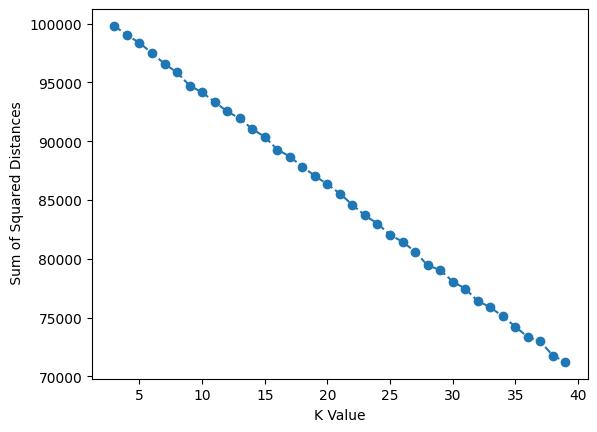

In [17]:
plt.plot(range(3,40),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

## Choosing k=32

In [18]:

ssd

[99812.86866906729,
 99027.78967013196,
 98371.01091638391,
 97498.02594429633,
 96586.18184145234,
 95852.5806855455,
 94733.07405080306,
 94158.62794342649,
 93353.20163079258,
 92534.09218601428,
 91954.01345995172,
 91042.43996132952,
 90376.86654413087,
 89299.86381607903,
 88702.34330150123,
 87829.7729402182,
 87066.50440849291,
 86341.002256574,
 85550.20326982431,
 84591.33658786875,
 83686.76882365876,
 82999.28059921769,
 82042.27329085987,
 81455.40533010224,
 80611.99405640013,
 79435.63654764568,
 79061.06519492442,
 78068.4124300058,
 77465.03650057814,
 76418.3430224231,
 75882.48052121521,
 75105.42634320166,
 74238.31649389688,
 73336.47048881993,
 72967.0090917126,
 71772.01176244597,
 71229.33935691675]

In [19]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0             NaN
1     -785.078999
2     -656.778754
3     -872.984972
4     -911.844103
5     -733.601156
6    -1119.506635
7     -574.446107
8     -805.426313
9     -819.109445
10    -580.078726
11    -911.573499
12    -665.573417
13   -1077.002728
14    -597.520515
15    -872.570361
16    -763.268532
17    -725.502152
18    -790.798987
19    -958.866682
20    -904.567764
21    -687.488224
22    -957.007308
23    -586.867961
24    -843.411274
25   -1176.357509
26    -374.571353
27    -992.652765
28    -603.375929
29   -1046.693478
30    -535.862501
31    -777.054178
32    -867.109849
33    -901.846005
34    -369.461397
35   -1194.997329
36    -542.672406
dtype: float64

<AxesSubplot:>

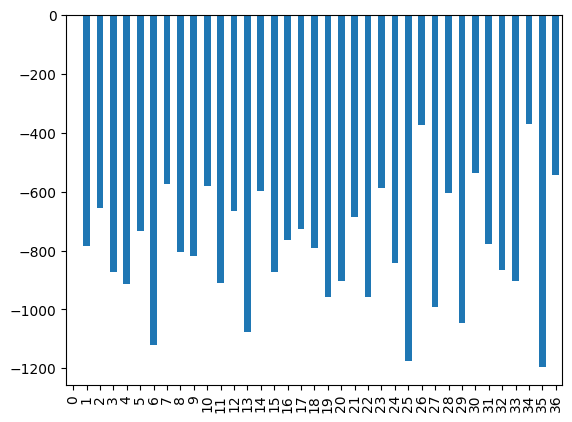

In [20]:
pd.Series(ssd).diff().plot(kind='bar')

In [21]:
list(customer_node.select_dtypes(include=["object"]))

['gender',
 'first_name',
 'last_name',
 'country',
 'nationality',
 'profession',
 'marital_status',
 'education_level',
 'Label']

## Clustering on all Nodes

just adjust the code for when to scale or not & when to encode or not some cases u will not need both at the same times 


In [22]:
k=32
ssd_nodes=[]
labels_nodes=[]
type_map = {str: 'string', tuple: 'tuple', list: 'list', dict: 'dict', int: 'int' ,float: "float"}

for node_name,node_value in train_data.items():
    unique_values={}
    c_node=train_data[node_name]
    
    cols2rm=[]
    
    # determine the data type of each element
    for t in list(c_node):
        c_node[f'{t}_type'] = c_node[t].map(type).map(type_map).fillna('other')
        if(len(c_node[f'{t}_type'].unique().tolist()))==1:
            if( (c_node[f'{t}_type'].unique().tolist())[0] not in ['string','int','float']):
                cols2rm.append(t)
        c_node=c_node.drop(columns=[f'{t}_type'], axis=1)
    
    
    
    print(f"Node name: {node_name}")
    print(f"Node shape (rows,columns): {node_value.shape}")
    print(f"Node dtypes: {c_node.dtypes}")
    print(f"Node specifc dtypes: {unique_values}")
    print(f"Columns to remove: {cols2rm}")
    ids=list(filter(lambda x: "id" in x.lower(), c_node.columns))+["Label"]+cols2rm
    
    print("Ignoring id columns +others...")
    print(ids)

    X = c_node[c_node.columns.difference(ids)]
    
    # display(X)

    if len(list(X.select_dtypes(exclude=["object"]))) != 0:

        print("Scaling....")
        # print("X before scaling: ")
        # display(X)
        
        # create the StandardScaler object
        scaler = StandardScaler()

        # fit and transform the data
        df_scaled = scaler.fit_transform(X[list(X.select_dtypes(exclude=["object"]))])
        
        # create a dataframe with the scaled features
        df_scaled = pd.DataFrame(df_scaled, columns=list(X.select_dtypes(exclude=["object"])))
        
        X=X.drop(list(X.select_dtypes(exclude=["object"])), axis=1)
        X = pd.concat([X, df_scaled], axis=1)
        # print("X after scaling:")
        # display(X)
    
    # define one hot encoding
    
    if len(list(X.select_dtypes(include=["object"]))) != 0:
        
        print("Encoding....")
        
        # print("X before encoding:")
        # display(X)
    
        ohe = OneHotEncoder()

        # fit and transform the data
        # display(X[list(X.select_dtypes(include=["object"]))])
        Xn = ohe.fit_transform(X[list(X.select_dtypes(include=["object"]))]).toarray()

        # get the feature names generated by the encoder
        feature_names = ohe.get_feature_names(list(X.select_dtypes(include=["object"])))

        # create a dataframe with the encoded features
        df_encoded = pd.DataFrame(Xn, columns=feature_names)
        
        # drop the original column
        X =  X.drop(list(X.select_dtypes(include=["object"])), axis=1)

        # concatenate the original data with the encoded features
        X = pd.concat([X, df_encoded], axis=1)

        
        # In this example, the OneHotEncoder object is created and fit to the data using the fit_transform method.
        # The result of the transformation is stored in the X array. 
        # The get_feature_names method is then used to get the names of the new columns created by the encoder. 
        # These names are used to create a dataframe with the encoded features.
        # Finally, the original data is concatenated with the encoded data and the original column is dropped to produce the final dataframe.
        
        # print("X after encoding:")
        # display(X)

    # break
    
    # break
    
    print("Model Fitting....")
    model = KMeans(n_clusters=k)
    
    model.fit(X)
    print("Prediction Fitting...")
    cluster_labels = model.fit_predict(X)
    
    ssd_nodes.append(model.inertia_)
    labels_nodes.append(cluster_labels)
    
    # c_node['Cluster']=cluster_labels
    train_data[node_name]['Cluster']=cluster_labels
    print("Node with cluster coulmn:")
    display(train_data[node_name])
    # break
    
    print("\n")
    # sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)
    
    # sns.pairplot()
    

Node name: supplier
Node shape (rows,columns): (300, 14)
Node dtypes: supp_id                        int64
supplier_name                 object
country                       object
city_name                     object
currency                      object
type                          object
number_of_employees            int64
Annual_sales                 float64
number_of_orders               int64
market_share (%)               int64
market_capitalization ($)    float64
Label                         object
ID                             int64
dtype: object
Node specifc dtypes: {}
Columns to remove: []
Ignoring id columns +others...
['supp_id', 'ID', 'Label']
Scaling....
Encoding....
Model Fitting....


d:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Prediction Fitting...
Node with cluster coulmn:


,supp_id,supplier_name,country,city_name,currency,type,number_of_employees,Annual_sales,number_of_orders,market_share (%),market_capitalization ($),Label,ID,supp_id_type,Cluster
0,34258,Taylor PLC,Lao People's Democratic Republic,Viangchan,Dollars,Financial Services,446,465.22,5565,48,5.970000e+11,supplier,34258,int,3
1,40868,Sorrentino SPA,Mozambique,Gaza,Dollars,Real Estate,533,8881.74,1871,98,9.170000e+11,supplier,40868,int,16
2,27813,Persico e figli,Saint Martin (French part),Unknown,Dollars,"Paper, Forest Products & Packaging",578,58.99,8611,9,6.980000e+11,supplier,27813,int,0
3,57551,Karge OHG mbH,Brunei Darussalam,Belait,Dollars,Oil & Gas,145,3.35,4320,41,8.790000e+11,supplier,57551,int,31
4,50099,"Smith, Porter and Lynch",Palau,Ngatpang,Dollars,Automotive & Assembly,872,8.39,2090,78,6.050000e+11,supplier,50099,int,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,90256,Förster,Ethiopia,Addis Ababa,Dollars,"Paper, Forest Products & Packaging",764,7024.13,7003,46,6.919014e+10,supplier,90256,int,5
296,35266,Gotthard Zahn GmbH,Finland,Pohjanmaa,Dollars,Healthcare Systems & Services,570,6.51,7985,42,1.470000e+11,supplier,35266,int,10
297,52647,Cook-Webb,Morocco,Berkane,Dollars,"Paper, Forest Products & Packaging",762,10.69,2171,35,7.630000e+11,supplier,52647,int,4
298,13355,Shah-Lowe,Central African Republic,Bamingui-Bangoran,Dollars,Automotive & Assembly,862,37.45,6844,50,2.150000e+11,supplier,13355,int,10




Node name: retailer
Node shape (rows,columns): (150, 13)
Node dtypes: retailer_id          int64
country             object
city_name           object
type                object
reviews_number       int64
retailer_types      object
rating               int64
opening_hours        int64
capacity (units)     int64
products_sold       object
Label               object
ID                   int64
dtype: object
Node specifc dtypes: {}
Columns to remove: ['retailer_types', 'products_sold']
Ignoring id columns +others...
['retailer_id', 'ID', 'Label', 'retailer_types', 'products_sold']
Scaling....
Encoding....
Model Fitting....


d:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Prediction Fitting...
Node with cluster coulmn:


,retailer_id,country,city_name,type,reviews_number,retailer_types,rating,opening_hours,capacity (units),products_sold,Label,ID,retailer_id_type,Cluster
0,91089,Tunisia,Kairouan,distributer,650,[],5,7,169554,[],retailer,91089,int,21
1,95444,Kuwait,Al Farwānīyah,vendor,441,[],1,8,325442,[],retailer,95444,int,4
2,66051,Qatar,Ash Shīḩānīyah,abroad,821,[],2,9,426160,[],retailer,66051,int,20
3,41072,Greece,Dytikí Makedonía,customer end,123,[Healthcare Systems & Services],2,4,1347204,"[520, 971]",retailer,41072,int,8
4,34083,Gambia,Banjul,vendor,815,[],4,7,1843949,[],retailer,34083,int,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,86308,Ukraine,Chernihivska oblast,vendor,987,[Financial Services],4,8,1316087,[772],retailer,86308,int,13
146,18464,Haiti,Grandans,customer end,295,[],2,5,1686073,[],retailer,18464,int,8
147,57039,Lao People's Democratic Republic,Viangchan,vendor,450,[],2,7,1019346,[],retailer,57039,int,22
148,33250,South Sudan,Lakes,customer end,318,[],4,6,716050,[],retailer,33250,int,18




Node name: customer
Node shape (rows,columns): (150, 13)
Node dtypes: cust_id             int64
gender             object
first_name         object
last_name          object
country            object
nationality        object
profession         object
marital_status     object
education_level    object
age                 int64
Label              object
ID                  int64
dtype: object
Node specifc dtypes: {}
Columns to remove: []
Ignoring id columns +others...
['cust_id', 'ID', 'Label']
Scaling....
Encoding....
Model Fitting....


d:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Prediction Fitting...
Node with cluster coulmn:


,cust_id,gender,first_name,last_name,country,nationality,profession,marital_status,education_level,age,Label,ID,cust_id_type,Cluster
0,33736,F,Nadia,Scheel,Cabo Verde,Cabo Verde,"Production assistant, television",Single,PHD holder,92,customer,33736,int,19
1,42959,M,Eric,David,Dominica,Italy,"Scientist, clinical (histocompatibility and im...",Married,PHD holder,39,customer,42959,int,20
2,50653,F,Alessia,Villegas,"Virgin Islands, British","Virgin Islands, British",directeur de golf,Divorced,PHD holder,43,customer,50653,int,3
3,82485,M,Alexei,Wulf,Samoa,Samoa,"Scientist, audiological",Divorced,Bachelor holder,54,customer,82485,int,1
4,56609,F,Brenda,Fox,Poland,Poland,actuaire,Widow,Bachelor holder,83,customer,56609,int,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,82421,F,Mary,Bell,Montserrat,Italy,Network engineer,Widow,Bachelor holder,42,customer,82421,int,30
146,14074,F,Luce,Le Gall,Jersey,Jersey,Games developer,Single,Masters holder,26,customer,14074,int,7
147,95571,M,Timothy,Moreno,Madagascar,Madagascar,"Engineer, civil (consulting)",Single,Masters holder,74,customer,95571,int,18
148,41209,F,Emmi,Fritsch,Colombia,Germany,"ingénieur fluides, énergies, réseaux, environn...",Widow,High school,64,customer,41209,int,14




Node name: warehouses
Node shape (rows,columns): (1000, 10)
Node dtypes: warehouse_id             int64
country                 object
city_name               object
capacity (NA)            int64
product_types           object
Operations Expenses    float64
Rental price           float64
Label                   object
ID                       int64
dtype: object
Node specifc dtypes: {}
Columns to remove: ['product_types']
Ignoring id columns +others...
['warehouse_id', 'ID', 'Label', 'product_types']
Scaling....
Encoding....
Model Fitting....


d:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Prediction Fitting...
Node with cluster coulmn:


,warehouse_id,country,city_name,capacity (NA),product_types,Operations Expenses,Rental price,Label,ID,warehouse_id_type,Cluster
0,1012,Sierra Leone,Eastern,870268,"[B, N, D, R]",0.51,2.87,warehouses,1012,int,26
1,1017,Réunion,Unknown,453753,"[G, W, O, A]",0.67,2.11,warehouses,1017,int,15
2,1028,Malawi,Chitipa,687914,"[Z, M, F, E, O, X, S]",0.59,2.26,warehouses,1028,int,11
3,1034,Lao People's Democratic Republic,Viangchan,594912,"[H, D, R, G, O, A, W]",0.93,2.70,warehouses,1034,int,2
4,1045,Cocos (Keeling) Islands,Unknown,336363,"[S, Q, C, V]",0.67,1.93,warehouses,1045,int,15
...,...,...,...,...,...,...,...,...,...,...,...
995,9964,Norway,Jan Mayen (Arctic Region),918141,"[U, T, H, L]",0.66,1.88,warehouses,9964,int,10
996,9970,Bouvet Island,Unknown,654580,"[B, W]",0.74,1.91,warehouses,9970,int,30
997,9975,Plurinational State of Bolivia,Tarija,850849,"[I, K, W, A, V, Y, Z]",0.54,2.13,warehouses,9975,int,0
998,9981,Qatar,Ash Shamāl,105036,"[Q, A]",0.70,2.91,warehouses,9981,int,4




Node name: externaltransactions
Node shape (rows,columns): (100, 6)
Node dtypes: ExtTran_id     int64
CompFrom       int64
Custto         int64
Label         object
ID             int64
dtype: object
Node specifc dtypes: {}
Columns to remove: []
Ignoring id columns +others...
['ExtTran_id', 'ID', 'Label']
Scaling....
Model Fitting....
Prediction Fitting...
Node with cluster coulmn:


,ExtTran_id,CompFrom,Custto,Label,ID,ExtTran_id_type,Cluster
0,2611,74318,13248,externaltransactions,2611,int,19
1,7858,90236,99404,externaltransactions,7858,int,1
2,4247,19878,50653,externaltransactions,4247,int,18
3,2530,91465,50014,externaltransactions,2530,int,26
4,3381,54148,87421,externaltransactions,3381,int,17
...,...,...,...,...,...,...,...
95,9232,87695,11082,externaltransactions,9232,int,9
96,8429,13920,41538,externaltransactions,8429,int,18
97,4926,23640,78934,externaltransactions,4926,int,22
98,6209,35841,18779,externaltransactions,6209,int,20




Node name: internaltransactions
Node shape (rows,columns): (100, 6)
Node dtypes: IntTran_id     int64
CompFrom       int64
Compto         int64
Label         object
ID             int64
dtype: object
Node specifc dtypes: {}
Columns to remove: []
Ignoring id columns +others...
['IntTran_id', 'ID', 'Label']
Scaling....
Model Fitting....
Prediction Fitting...
Node with cluster coulmn:


,IntTran_id,CompFrom,Compto,Label,ID,IntTran_id_type,Cluster
0,7927,78265,87916,internaltransactions,7927,int,22
1,8659,56104,30864,internaltransactions,8659,int,21
2,2751,34967,57109,internaltransactions,2751,int,25
3,3389,52082,87695,internaltransactions,3389,int,12
4,3917,92698,16265,internaltransactions,3917,int,14
...,...,...,...,...,...,...,...
95,9055,58976,46204,internaltransactions,9055,int,29
96,8775,40597,71916,internaltransactions,8775,int,15
97,8685,28042,70050,internaltransactions,8685,int,4
98,5939,19878,55787,internaltransactions,5939,int,31




Node name: srintship
Node shape (rows,columns): (51, 7)
Node dtypes: IntShip_id             int64
listSuppIds            int64
factoryIds             int64
TransportationType    object
Label                 object
ID                     int64
dtype: object
Node specifc dtypes: {}
Columns to remove: []
Ignoring id columns +others...
['IntShip_id', 'listSuppIds', 'factoryIds', 'ID', 'Label']
Encoding....
Model Fitting....
Prediction Fitting...


d:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9064\2502252675.py:100: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  model.fit(X)


Node with cluster coulmn:


d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


,IntShip_id,listSuppIds,factoryIds,TransportationType,Label,ID,IntShip_id_type,Cluster
0,5897,36243,67361,Air,srintship,5897,int,0
1,2360,89467,46954,Air,srintship,2360,int,0
2,6209,40597,76987,Land,srintship,6209,int,1
3,1480,90942,82830,Air,srintship,1480,int,0
4,2887,11790,83982,Land,srintship,2887,int,1
5,2838,20226,49955,Air,srintship,2838,int,0
6,8010,52160,41072,Air,srintship,8010,int,0
7,8144,86580,21359,Sea,srintship,8144,int,8
8,2907,30692,67361,Sea,srintship,2907,int,8
9,4214,46894,31857,Sea,srintship,4214,int,8


d:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9064\2502252675.py:100: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  model.fit(X)




Node name: rcextship
Node shape (rows,columns): (51, 7)
Node dtypes: ExtShip_id                 int64
factoryIds/retailerIds     int64
idsTo                      int64
TransportationType        object
Label                     object
ID                         int64
dtype: object
Node specifc dtypes: {}
Columns to remove: []
Ignoring id columns +others...
['ExtShip_id', 'factoryIds/retailerIds', 'idsTo', 'ID', 'Label']
Encoding....
Model Fitting....
Prediction Fitting...
Node with cluster coulmn:


d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


,ExtShip_id,factoryIds/retailerIds,idsTo,TransportationType,Label,ID,ExtShip_id_type,Cluster
0,2108,63898,12666,Land,rcextship,2108,int,1
1,6720,26336,83792,Sea,rcextship,6720,int,0
2,5965,31857,16956,Land,rcextship,5965,int,1
3,4536,67158,45986,Air,rcextship,4536,int,2
4,2575,26654,64367,Land,rcextship,2575,int,1
5,1281,90345,84885,Air,rcextship,1281,int,2
6,4492,91089,50014,Land,rcextship,4492,int,1
7,8644,22049,90435,Land,rcextship,8644,int,1
8,6650,94027,21113,Sea,rcextship,6650,int,0
9,1139,45151,43022,Land,rcextship,1139,int,1


d:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)




Node name: scextship
Node shape (rows,columns): (49, 7)
Node dtypes: ExtShip_id                 int64
factoryIds/retailerIds     int64
idsTo                      int64
TransportationType        object
Label                     object
ID                         int64
dtype: object
Node specifc dtypes: {}
Columns to remove: []
Ignoring id columns +others...
['ExtShip_id', 'factoryIds/retailerIds', 'idsTo', 'ID', 'Label']
Encoding....
Model Fitting....


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9064\2502252675.py:100: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  model.fit(X)


Prediction Fitting...
Node with cluster coulmn:


d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


,ExtShip_id,factoryIds/retailerIds,idsTo,TransportationType,Label,ID,ExtShip_id_type,Cluster
0,1456,99762,15724,Sea,scextship,1456,int,2
1,5089,97142,91846,Air,scextship,5089,int,0
2,7708,26533,39892,Sea,scextship,7708,int,2
3,7960,48580,81782,Air,scextship,7960,int,0
4,5028,68240,27430,Air,scextship,5028,int,0
5,4413,23640,85900,Land,scextship,4413,int,4
6,9033,55787,69145,Air,scextship,9033,int,0
7,3246,13920,15307,Air,scextship,3246,int,0
8,8786,20226,48068,Land,scextship,8786,int,4
9,1422,55787,83792,Land,scextship,1422,int,4


d:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)




Node name: ssintship
Node shape (rows,columns): (537, 7)
Node dtypes: IntShip_id             int64
listSuppIds            int64
factoryIds             int64
TransportationType    object
Label                 object
ID                     int64
dtype: object
Node specifc dtypes: {}
Columns to remove: []
Ignoring id columns +others...
['IntShip_id', 'listSuppIds', 'factoryIds', 'ID', 'Label']
Encoding....
Model Fitting....


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9064\2502252675.py:100: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  model.fit(X)


Prediction Fitting...
Node with cluster coulmn:


d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


,IntShip_id,listSuppIds,factoryIds,TransportationType,Label,ID,IntShip_id_type,Cluster
0,7281,90942,52160,Land,ssintship,7281,int,1
1,3477,87916,30692,Land,ssintship,3477,int,1
2,8796,90236,26533,Sea,ssintship,8796,int,6
3,2933,76443,51293,Air,ssintship,2933,int,0
4,3000,14125,68357,Land,ssintship,3000,int,1
...,...,...,...,...,...,...,...,...
532,10478,42179,46070,Sea,ssintship,10478,int,6
533,10479,48467,46070,Sea,ssintship,10479,int,6
534,10480,70468,18952,Air,ssintship,10480,int,0
535,10481,48580,18952,Land,ssintship,10481,int,1


d:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)




Node name: internalservices
Node shape (rows,columns): (100, 10)
Node dtypes: IntServ_id         int64
IntTrans_id        int64
placed_when       object
actual_date       object
expected_date     object
quota            float64
status            object
Label             object
ID                 int64
dtype: object
Node specifc dtypes: {}
Columns to remove: []
Ignoring id columns +others...
['IntServ_id', 'IntTrans_id', 'ID', 'Label']
Scaling....
Encoding....
Model Fitting....
Prediction Fitting...
Node with cluster coulmn:


,IntServ_id,IntTrans_id,placed_when,actual_date,expected_date,quota,status,Label,ID,IntServ_id_type,Cluster
0,5822,5738,1971-03-20,1971-04-03,1971-04-19,7.20,Processed,internalservices,5822,int,7
1,9032,1952,1985-07-11,1985-08-01,1985-07-27,2.65,Pending,internalservices,9032,int,11
2,6669,4782,1987-07-14,1987-08-12,1987-08-07,3.64,Pending,internalservices,6669,int,11
3,1165,8659,2000-08-31,2000-09-11,2000-09-24,1248.57,Processed,internalservices,1165,int,9
4,7448,4782,1988-01-11,1988-02-05,1988-02-09,17.11,Processed,internalservices,7448,int,7
...,...,...,...,...,...,...,...,...,...,...,...
95,9334,4502,2017-02-28,2017-03-13,2017-03-13,861.82,Processed,internalservices,9334,int,24
96,5599,3581,1973-05-05,1973-05-26,1973-05-21,902.96,Pending,internalservices,5599,int,12
97,3103,1793,1988-06-22,1988-07-18,1988-07-13,60.33,Pending,internalservices,3103,int,4
98,4859,6220,2000-05-01,2000-05-14,2000-05-16,9866.19,Processed,internalservices,4859,int,21




Node name: rcextorders
Node shape (rows,columns): (52, 12)
Node dtypes: ExtOrders_id       int64
ExtShip_id         int64
quantity           int64
placed_when       object
actual_date       object
expected_date     object
cost             float64
status            object
prod_id            int64
Label             object
ID                 int64
dtype: object
Node specifc dtypes: {}
Columns to remove: []
Ignoring id columns +others...
['ExtOrders_id', 'ExtShip_id', 'prod_id', 'ID', 'Label']
Scaling....
Encoding....
Model Fitting....


d:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Prediction Fitting...
Node with cluster coulmn:


,ExtOrders_id,ExtShip_id,quantity,placed_when,actual_date,expected_date,cost,status,prod_id,Label,ID,ExtOrders_id_type,Cluster
0,4444,7105,222,1990-12-23,Unknown,1991-01-18,399924.12,Out For Delivery,802,rcextorders,4444,int,6
1,8666,7217,515,1979-01-24,1979-02-14 00:00:00,1979-02-11,395514.85,Delayed,309,rcextorders,8666,int,24
2,1414,2575,436,1982-04-29,Unknown,1982-05-23,312677.40,Out For Delivery,833,rcextorders,1414,int,1
3,1321,8699,308,1984-11-12,1984-12-12 00:00:00,1984-12-05,842441.60,Delayed,345,rcextorders,1321,int,13
4,5984,8644,440,1982-09-02,Unknown,1982-10-01,31112.40,Out For Delivery,897,rcextorders,5984,int,1
5,1932,2845,167,2020-09-16,Unknown,2020-10-15,94901.09,Out For Delivery,145,rcextorders,1932,int,6
6,8691,8699,522,1990-10-31,Unknown,1990-11-26,52053.84,Out For Delivery,767,rcextorders,8691,int,1
7,7793,8644,583,1972-04-22,Unknown,1972-05-13,41223.93,Out For Delivery,897,rcextorders,7793,int,1
8,9035,2845,618,1992-10-16,Unknown,1992-11-09,348057.60,Out For Delivery,300,rcextorders,9035,int,23
9,3622,7945,136,1979-05-10,1979-05-29 00:00:00,1979-05-20,4187.44,Delayed,882,rcextorders,3622,int,31




Node name: facilities
Node shape (rows,columns): (2000, 11)
Node dtypes: fac_id                   int64
supplier_id              int64
market_cap              object
country                 object
city_name               object
currency                object
number_of_employees      int64
Annual_sales           float64
Label                   object
ID                       int64
dtype: object
Node specifc dtypes: {}
Columns to remove: []
Ignoring id columns +others...
['fac_id', 'supplier_id', 'ID', 'Label']
Scaling....
Encoding....


d:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Model Fitting....
Prediction Fitting...
Node with cluster coulmn:


,fac_id,supplier_id,market_cap,country,city_name,currency,number_of_employees,Annual_sales,Label,ID,fac_id_type,Cluster
0,694420,81114,166 1.265555e+10\nName: market_capitalizati...,Algeria,Laghouat,Dollars,260,6044.69,facilities,694420,int,29
1,678955,81114,166 2.036310e+10\nName: market_capitalizati...,New Caledonia,Unknown,Dollars,343,7.51,facilities,678955,int,14
2,719035,81114,166 2.420775e+10\nName: market_capitalizati...,Slovakia,Trenčiansky kraj,Dollars,720,4.25,facilities,719035,int,28
3,240432,81114,166 2.079319e+09\nName: market_capitalizati...,Yemen,Laḩij,Dollars,584,9900.93,facilities,240432,int,13
4,385384,81114,166 8.591279e+10\nName: market_capitalizati...,Western Sahara,Unknown,Dollars,568,458.37,facilities,385384,int,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,458827,76088,120 9.000936e+10\nName: market_capitalizati...,New Caledonia,Unknown,Dollars,115,301.37,facilities,458827,int,14
1996,953728,76088,120 2.039393e+11\nName: market_capitalizati...,Bahrain,Al Janūbīyah,Dollars,356,718.49,facilities,953728,int,4
1997,902028,76088,120 2.810986e+10\nName: market_capitalizati...,Malawi,Balaka,Dollars,166,12.75,facilities,902028,int,20
1998,143381,76088,120 1.147001e+10\nName: market_capitalizati...,Papua New Guinea,Gulf,Dollars,777,651.73,facilities,143381,int,0




Node name: externalservices
Node shape (rows,columns): (100, 10)
Node dtypes: ExtServ_id         int64
ExtTrans_id        int64
placed_when       object
actual_date       object
expected_date     object
quota            float64
status            object
Label             object
ID                 int64
dtype: object
Node specifc dtypes: {}
Columns to remove: []
Ignoring id columns +others...
['ExtServ_id', 'ExtTrans_id', 'ID', 'Label']
Scaling....
Encoding....
Model Fitting....


d:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Prediction Fitting...
Node with cluster coulmn:


,ExtServ_id,ExtTrans_id,placed_when,actual_date,expected_date,quota,status,Label,ID,ExtServ_id_type,Cluster
0,8478,1030,1970-01-21,1970-02-17,1970-02-06,1.95,Pending,externalservices,8478,int,17
1,9860,4680,1971-09-10,1971-10-04,1971-10-02,2.93,Pending,externalservices,9860,int,17
2,1567,6696,2001-10-02,2001-10-25,2001-10-23,4500.93,Pending,externalservices,1567,int,3
3,5121,8014,2004-01-30,2004-02-17,2004-02-11,3792.70,Pending,externalservices,5121,int,11
4,4942,7892,1970-09-08,1970-09-22,1970-09-28,1.84,Processed,externalservices,4942,int,16
...,...,...,...,...,...,...,...,...,...,...,...
95,2021,1822,1987-03-28,1987-04-18,1987-04-19,73.87,Processed,externalservices,2021,int,4
96,9783,2466,2005-08-23,2005-09-07,2005-09-22,673.59,Processed,externalservices,9783,int,1
97,1044,5176,2018-10-09,2018-10-23,2018-10-24,9.59,Processed,externalservices,1044,int,16
98,3024,9057,2013-06-22,2013-07-17,2013-07-08,1646.60,Pending,externalservices,3024,int,13




Node name: products
Node shape (rows,columns): (500, 9)
Node dtypes: prod_id                int64
product_type          object
product_name          object
warehouses            object
price                float64
profit_margin (%)      int64
Label                 object
ID                     int64
dtype: object
Node specifc dtypes: {}
Columns to remove: ['warehouses']
Ignoring id columns +others...
['prod_id', 'ID', 'Label', 'warehouses']
Scaling....
Encoding....
Model Fitting....


d:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Prediction Fitting...
Node with cluster coulmn:


,prod_id,product_type,product_name,warehouses,price,profit_margin (%),Label,ID,prod_id_type,Cluster
0,911,M,WWW,"[5498, 6164, 5623, 7418, 8962, 7721, 4208, 871...",3088.68,24,products,911,int,2
1,316,F,MMM,"[3865, 5351]",107.39,47,products,316,int,3
2,549,P,LLL,[1969],47.14,7,products,549,int,29
3,801,V,SSS,"[3613, 4412, 2730, 1482, 2430, 7465, 8954, 118...",13.62,6,products,801,int,25
4,791,R,AAA,"[3514, 9292, 9388, 6379, 1149, 1526, 6928, 1888]",6.35,7,products,791,int,25
...,...,...,...,...,...,...,...,...,...,...
495,835,D,KKK,"[1835, 4047, 2155, 2969, 1249, 9807]",8530.71,24,products,835,int,8
496,323,C,III,"[5381, 7237, 3468, 5177, 2881]",2310.31,30,products,323,int,26
497,742,M,OOO,"[6283, 3413]",6080.30,13,products,742,int,2
498,412,X,III,"[7377, 2002, 8299, 1735, 5966, 6548, 4501, 752...",21.64,44,products,412,int,18




Node name: srintorders
Node shape (rows,columns): (74, 12)
Node dtypes: IntOrders_id       int64
IntShip_id         int64
quantity           int64
placed_when       object
actual_date       object
expected_date     object
cost             float64
status            object
prod_id            int64
Label             object
ID                 int64
dtype: object
Node specifc dtypes: {}
Columns to remove: []
Ignoring id columns +others...
['IntOrders_id', 'IntShip_id', 'prod_id', 'ID', 'Label']
Scaling....
Encoding....
Model Fitting....
Prediction Fitting...


d:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Node with cluster coulmn:


,IntOrders_id,IntShip_id,quantity,placed_when,actual_date,expected_date,cost,status,prod_id,Label,ID,IntOrders_id_type,Cluster
0,8605,2360,766,1993-05-08,1993-05-30 00:00:00,1993-06-01,2428.22,Closed,274,srintorders,8605,int,5
1,3057,1388,771,2007-10-29,2007-11-08 00:00:00,2007-11-16,6800366.49,Closed,772,srintorders,3057,int,28
2,7340,9456,870,2000-07-24,2000-08-07 00:00:00,2000-08-03,536720.40,Delayed,831,srintorders,7340,int,19
3,1532,8335,127,2009-06-07,Unknown,2009-07-05,5585.46,Out For Delivery,140,srintorders,1532,int,3
4,2409,9313,560,2017-06-07,2017-06-18 00:00:00,2017-07-04,1531712.00,Closed,345,srintorders,2409,int,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,9959,1310,301,1993-05-08,1993-05-30 00:00:00,1993-06-01,21283.71,Closed,897,srintorders,9959,int,0
70,9960,4556,274,1993-05-08,1993-05-30 00:00:00,1993-06-01,19374.54,Closed,897,srintorders,9960,int,0
71,9961,6843,449,1993-05-08,1993-05-30 00:00:00,1993-06-01,3161346.14,Closed,990,srintorders,9961,int,7
72,9963,6673,801,1993-05-08,1993-05-30 00:00:00,1993-06-01,85578.84,Closed,520,srintorders,9963,int,5




Node name: scextorders
Node shape (rows,columns): (48, 12)
Node dtypes: ExtOrders_id       int64
ExtShip_id         int64
quantity           int64
placed_when       object
actual_date       object
expected_date     object
cost             float64
status            object
prod_id            int64
Label             object
ID                 int64
dtype: object
Node specifc dtypes: {}
Columns to remove: []
Ignoring id columns +others...
['ExtOrders_id', 'ExtShip_id', 'prod_id', 'ID', 'Label']
Scaling....
Encoding....
Model Fitting....


d:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Prediction Fitting...
Node with cluster coulmn:


,ExtOrders_id,ExtShip_id,quantity,placed_when,actual_date,expected_date,cost,status,prod_id,Label,ID,ExtOrders_id_type,Cluster
0,9052,3429,217,1980-08-10,Unknown,1980-08-26,1779786.26,Out For Delivery,786,scextorders,9052,int,12
1,5139,9786,284,2008-07-27,2008-08-17 00:00:00,2008-08-23,23813.40,Closed,856,scextorders,5139,int,4
2,8454,1456,409,2010-07-09,2010-08-03 00:00:00,2010-08-05,5570.58,Closed,801,scextorders,8454,int,24
3,4453,3246,948,1977-02-05,Unknown,1977-02-27,440706.24,Out For Delivery,534,scextorders,4453,int,9
4,5311,8924,983,2003-10-31,Unknown,2003-11-25,705194.37,Out For Delivery,391,scextorders,5311,int,9
5,5650,2269,268,1978-09-22,1978-10-08 00:00:00,1978-10-08,232881.28,Closed,886,scextorders,5650,int,30
6,4806,8588,546,1993-06-18,1993-07-17 00:00:00,1993-07-02,44215.08,Delayed,225,scextorders,4806,int,27
7,6681,2379,730,1981-10-31,Unknown,1981-11-14,7241694.90,Out For Delivery,492,scextorders,6681,int,15
8,4718,1431,692,1991-02-21,Unknown,1991-03-16,74313.88,Out For Delivery,316,scextorders,4718,int,1
9,4479,9477,493,1992-10-10,1992-10-30 00:00:00,1992-11-07,3527893.21,Closed,446,scextorders,4479,int,6




Node name: ssintorders
Node shape (rows,columns): (548, 12)
Node dtypes: IntOrders_id       int64
IntShip_id         int64
quantity           int64
placed_when       object
actual_date       object
expected_date     object
cost             float64
status            object
prod_id            int64
Label             object
ID                 int64
dtype: object
Node specifc dtypes: {}
Columns to remove: []
Ignoring id columns +others...
['IntOrders_id', 'IntShip_id', 'prod_id', 'ID', 'Label']
Scaling....
Encoding....
Model Fitting....


d:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Prediction Fitting...
Node with cluster coulmn:


,IntOrders_id,IntShip_id,quantity,placed_when,actual_date,expected_date,cost,status,prod_id,Label,ID,IntOrders_id_type,Cluster
0,6266,6224,438,1975-01-08,Unknown,1975-02-01,1581.18,Out For Delivery,838,ssintorders,6266,int,15
1,5318,6798,801,2021-01-18,2021-02-07 00:00:00,2021-01-29,2474032.68,Delayed,911,ssintorders,5318,int,26
2,2439,8796,882,1978-07-09,Unknown,1978-07-28,1789727.94,Out For Delivery,679,ssintorders,2439,int,27
3,1851,4895,220,2002-12-28,Unknown,2003-01-22,126137.00,Out For Delivery,963,ssintorders,1851,int,15
4,9800,3996,399,1975-10-06,Unknown,1975-10-29,394902.27,Out For Delivery,124,ssintorders,9800,int,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,10448,10478,618,1993-05-08,1993-05-30 00:00:00,1993-06-01,6093.48,Closed,452,ssintorders,10448,int,1
544,10449,10479,553,1993-05-08,1993-05-30 00:00:00,1993-06-01,43410.50,Closed,270,ssintorders,10449,int,6
545,10450,10480,409,1993-05-08,1993-05-30 00:00:00,1993-06-01,519.43,Closed,812,ssintorders,10450,int,6
546,10451,10481,904,1993-05-08,1993-05-30 00:00:00,1993-06-01,65838.32,Closed,885,ssintorders,10451,int,9


## Visualization

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9064\2551378409.py:7: UserWarning: 
The palette list has fewer values (10) than needed (32) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=myplot, x="ID", y="market_share (%)" ,hue='Cluster',palette=sns.color_palette("hls",10),


<AxesSubplot:xlabel='ID', ylabel='market_share (%)'>

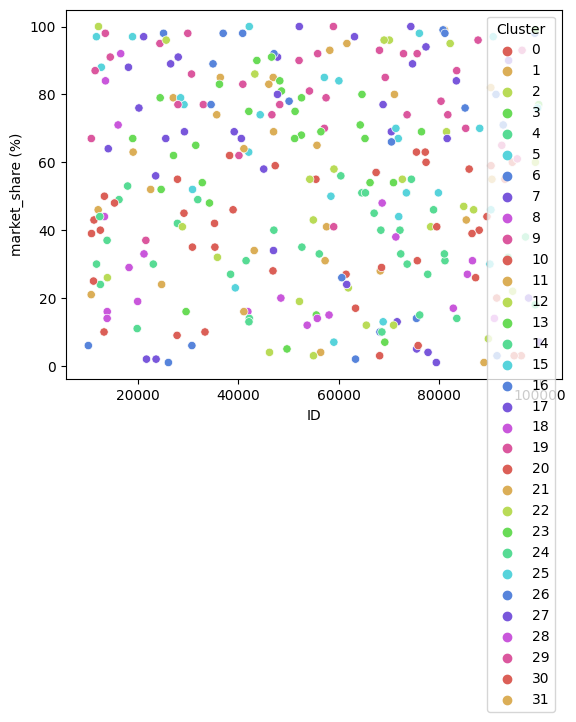

In [23]:
myplot=train_data["supplier"]

# plt.plot(train_data["supplier"]["ID"].to_list(),train_data["supplier"]["Cluster"],'o--')
# plt.xlabel("ID")
# plt.ylabel("Cluster")

sns.scatterplot(data=myplot, x="ID", y="market_share (%)" ,hue='Cluster',palette=sns.color_palette("hls",10),
               legend="full")

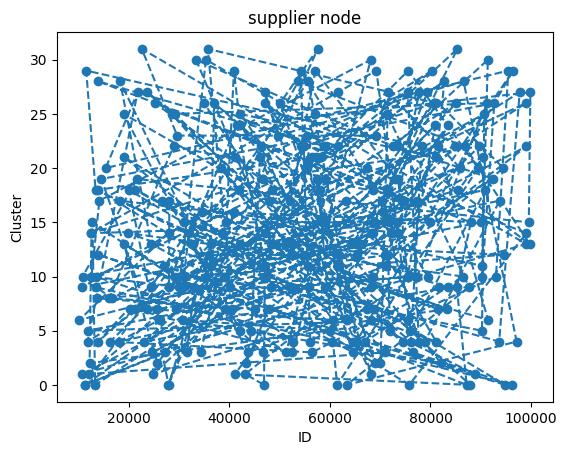

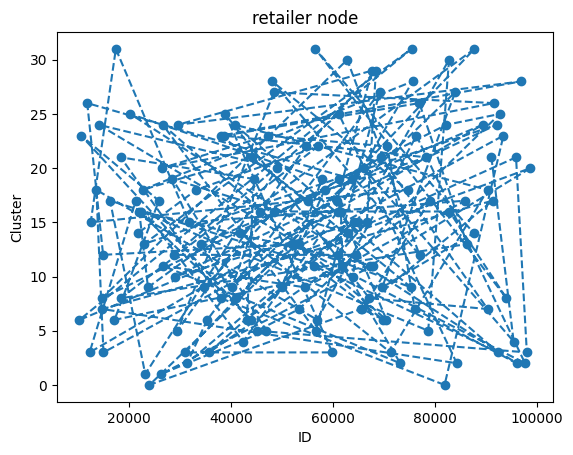

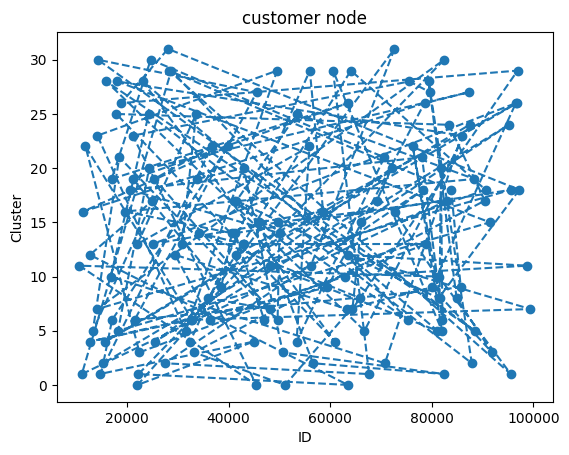

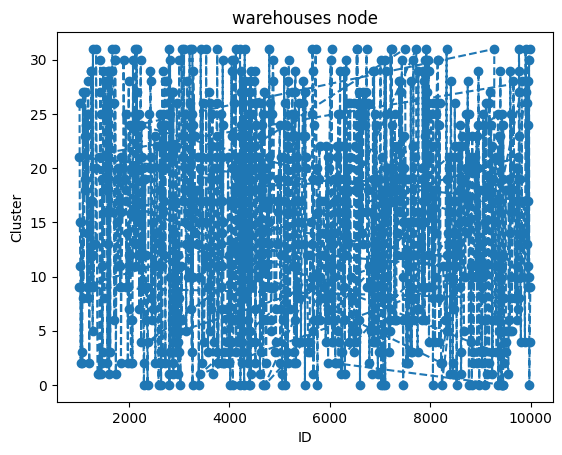

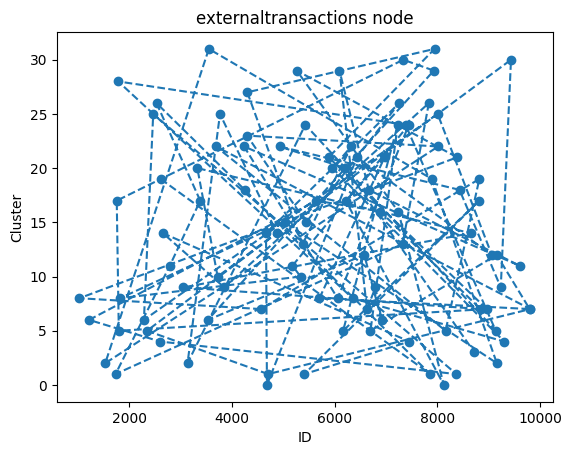

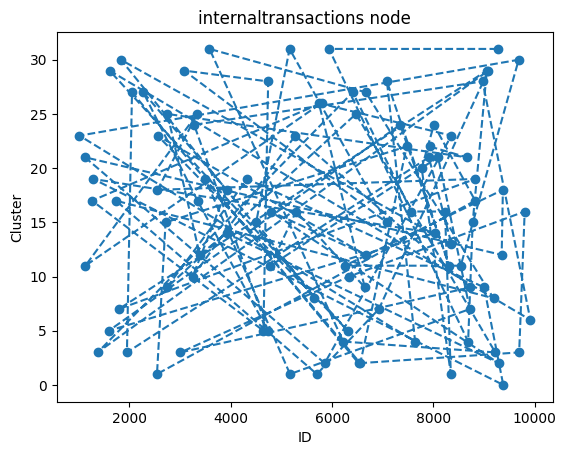

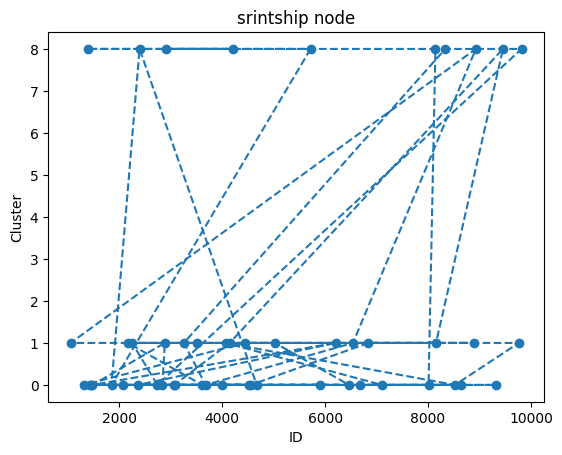

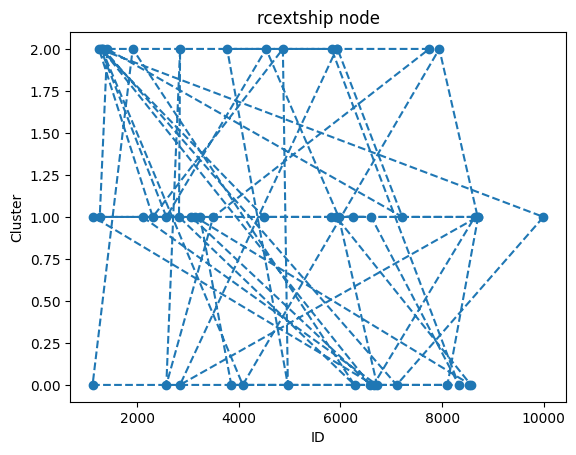

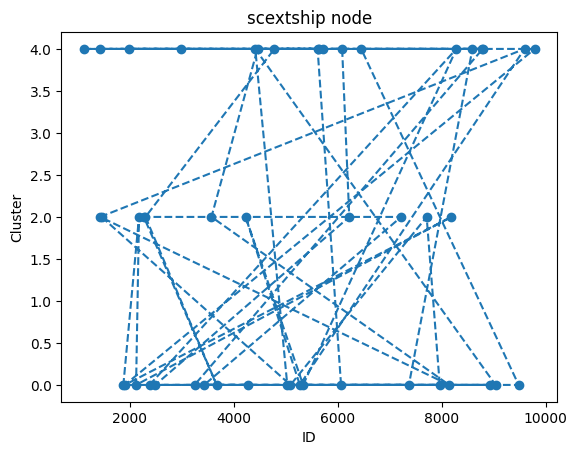

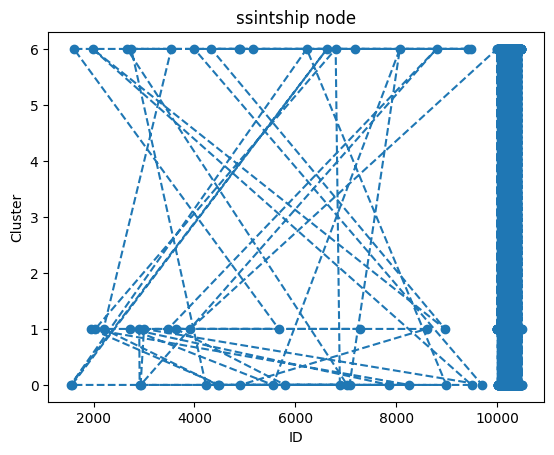

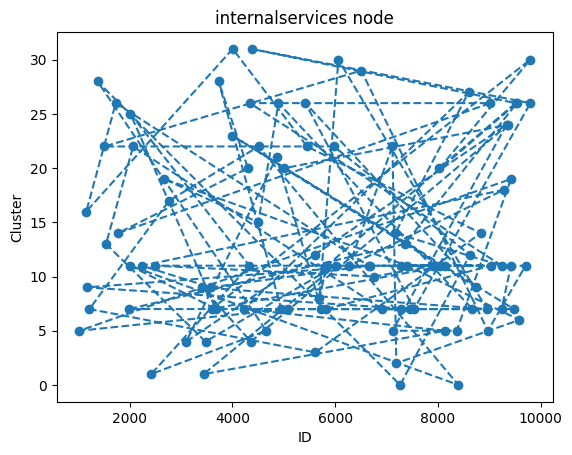

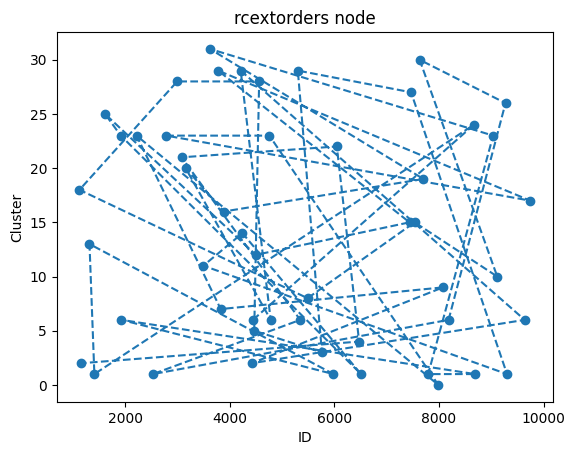

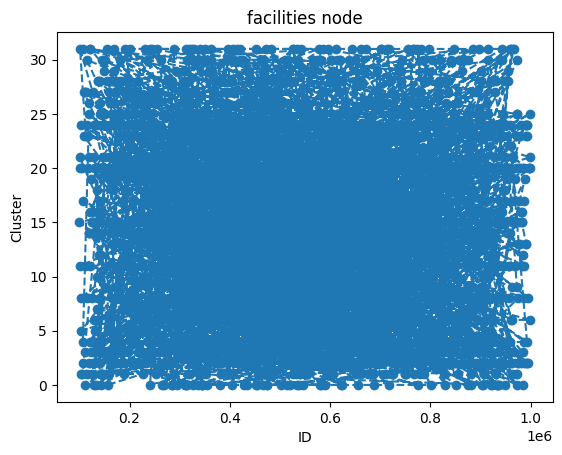

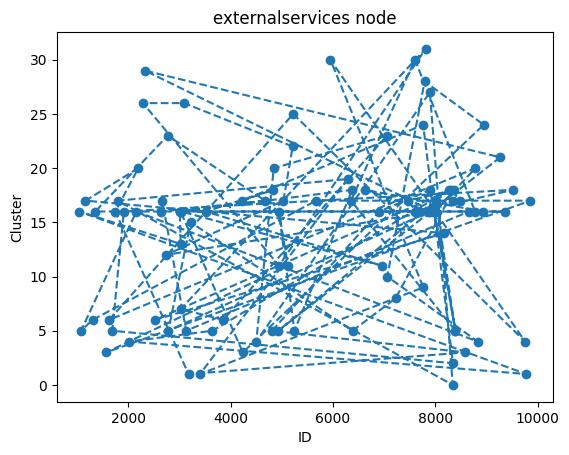

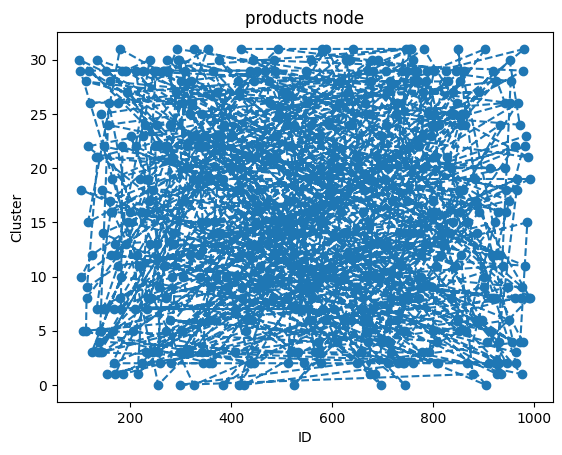

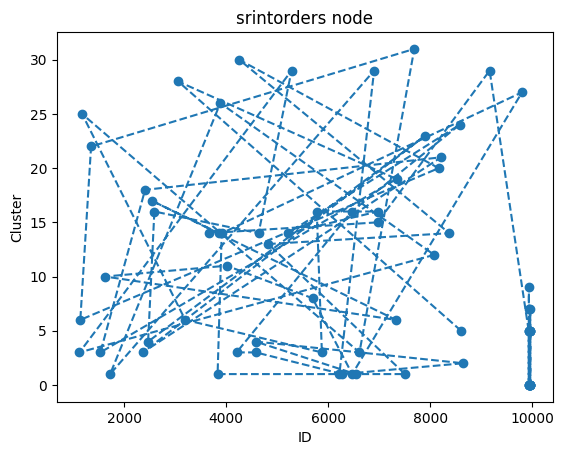

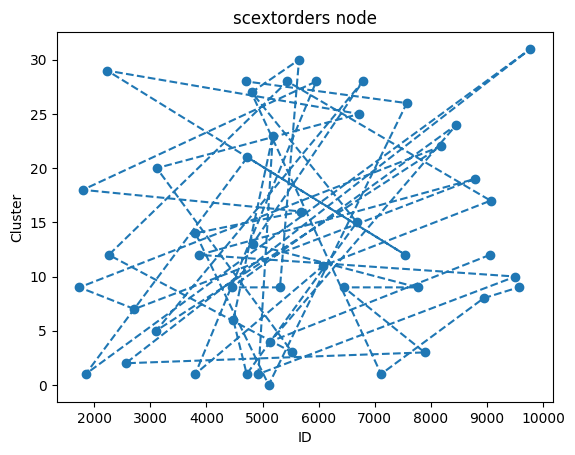

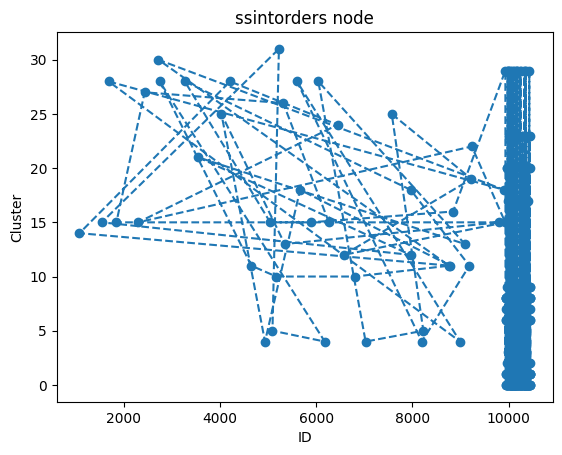

In [34]:
for k,v in train_data.items():
    plt.figure()
    plt.title(k + " node")
    plt.plot(list(train_data[k].iloc[:, 0]),train_data[k]['Cluster'].to_list(),'o--')
    plt.xlabel("ID")
    plt.ylabel("Cluster")
    plt.show()